## Titanic Survival Prediction

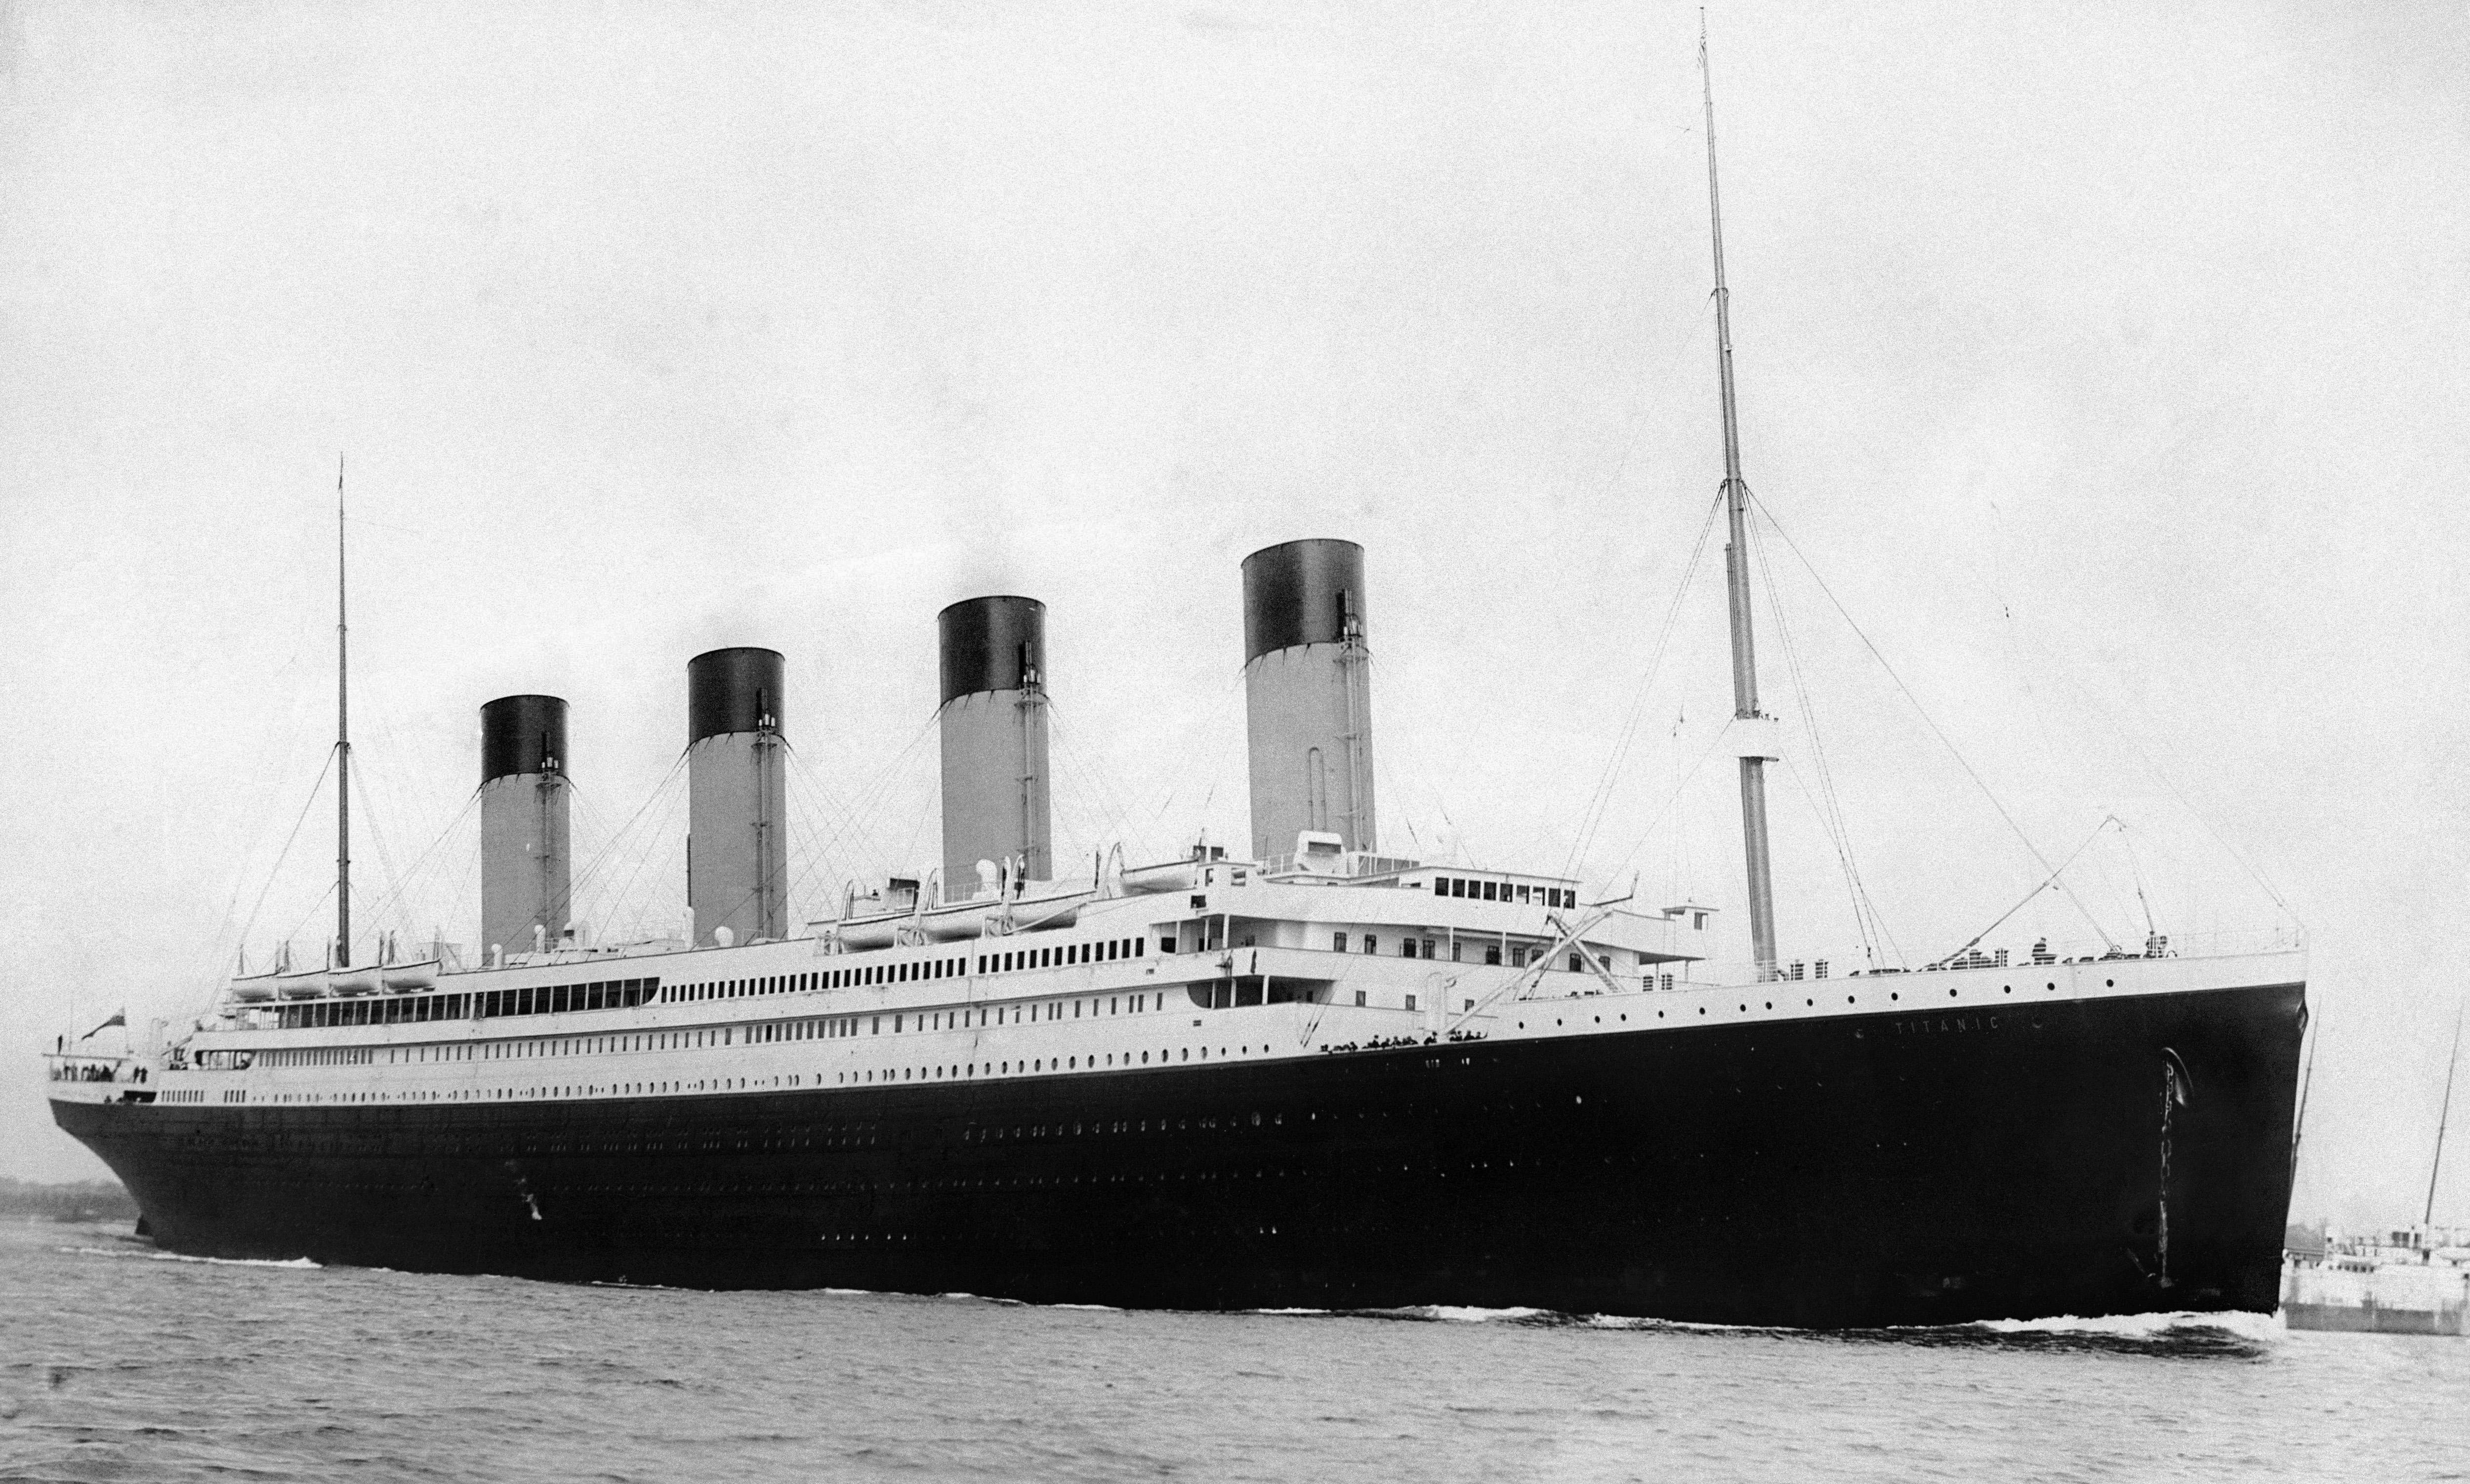

___
**About this project: This project consists prediction of survival rate during Titanic shipwreck down in the North Atlantic Ocean on 15 April 1912 after striking an iceberg.**
___

In [262]:
# import libraries for data analysis
import pandas as pd
import numpy as np

# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')

**Read the dataframe called with data.**

In [122]:
data = pd.read_csv('tested.csv')
data

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male   NaN      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male   NaN      0      0   
417                      Peter, Master. Michael J    male   NaN      1      1   

                 Ticket      Fare Cabin Embarked  
0                330911    7.8292   NaN        Q  
1                363272    7.0000   NaN        S  
2                240276    9.6875   NaN        Q  
3                315154    8.6625   NaN        S  
4               3101298   12.2875   NaN        S  
..                  ...       ...   ...      ...  
413           A.5. 3236    8.0500   NaN        S  
414            PC 17758  108.9000  C105        C  
415  SOTON/O.Q. 3101262    7.2500   NaN        S  
416              359309    8.0500   NaN        S  
417                2668   22.3583   NaN        C  

[418 rows x 12 columns]

In [4]:
data.info()
print("-"*41)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
-----------------------------------------


#### Observation:  
* Total 418 entries and 12 columns in this dataset. If we see and observe there is a missing data in Age, Fare, and Cabin columns.
___

In [5]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200

**Observation: By describing this dataset we can observe**
* Total passengers are 1309 i.e., 58.43% of actual passengers in Titanic (2,240).
* 75% passengers were less than 39 years.
* The highest fare is $512 and it is paying by less than 1% of passengers fare.
___

In [6]:
data.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

## Missing Values

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Observation:
* Age, Fare, and Cabin columns have some missing values and we probably drop this later.
___

**Now, Let's see this by visualization.**
* We can visualize the missing values by visualizing with Heatmap so that we can observe more visually.

<Axes: >

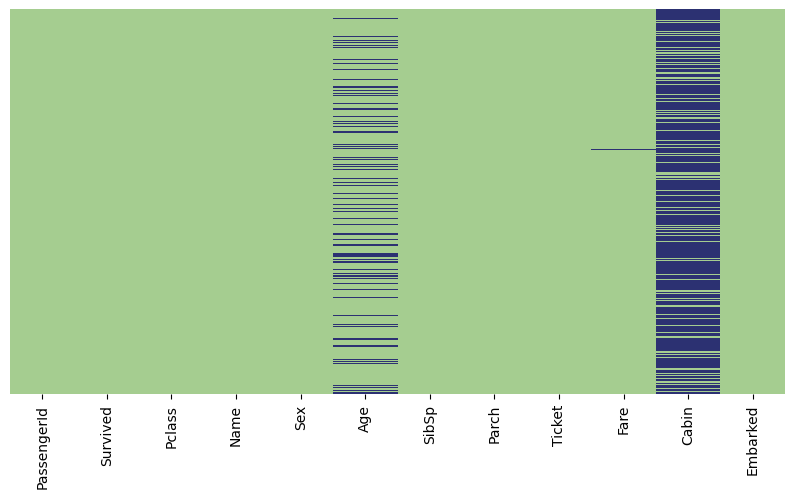

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),yticklabels = False,cbar=False, cmap='crest')

## Correlation Analysis
* **Now, Let's check the correlation between survived and Sex, Pclass, Sibsp, parch.**

* Pclass and Survived

In [9]:
data[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)

Pclass  Survived
0       1  0.467290
2       3  0.330275
1       2  0.322581

### Observation:
* There is no near correlation between Pclass and Survived.
___

* Sex ratio and Survived

In [10]:
data[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female       1.0
1    male       0.0

### Observation:
* Female had high survival rate at 1%.
___

* Sibsp and Survived

In [11]:
data[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
5      5  1.000000
6      8  0.500000
1      1  0.490909
2      2  0.428571
0      0  0.310954
3      3  0.250000
4      4  0.250000

### Observation:
* There is no near correlation between SibSp and Survived.
___

* Parch and Survived

In [12]:
data[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Parch  Survived
4      4  1.000000
3      3  0.666667
2      2  0.606061
1      1  0.538462
7      9  0.500000
0      0  0.305556
5      5  0.000000
6      6  0.000000

### Observation:
* There is no near correlation between Parch and Survived.
___

**Now Let's Visualize this correlation**
* Survival Rate

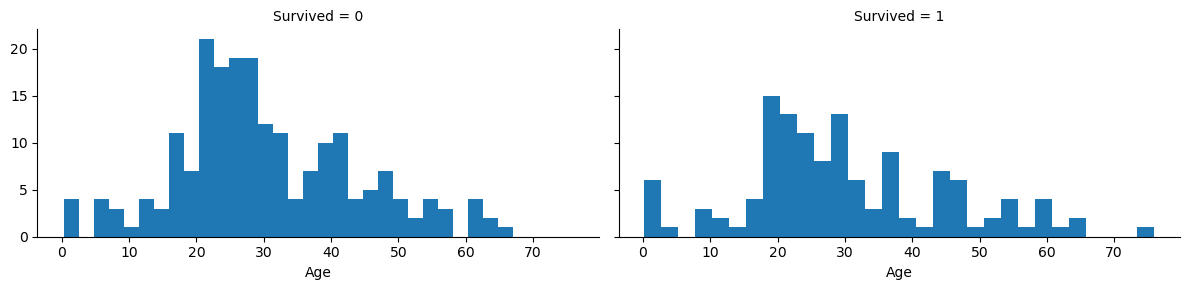

In [13]:
S = sns.FacetGrid(data=data, col='Survived',aspect=2)
S.map(plt.hist, 'Age', bins=30)

### Observation:
* Age <=4 passengers survived.
* Age between 15-25 passengers did not survive.
* Age = 80 survived.
* Most of passengers are between 15-35 age group.
___

* Pclass Survival Rate.

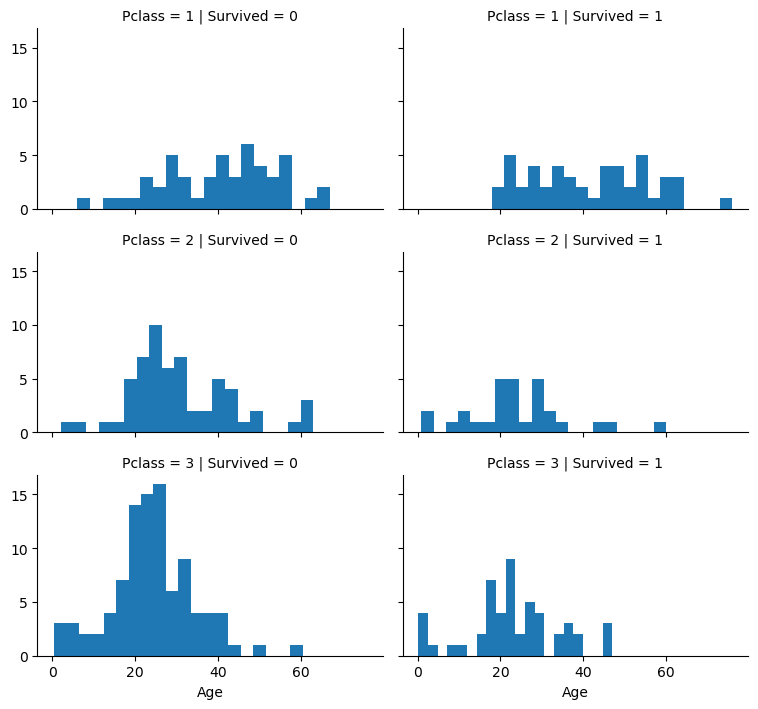

In [14]:
P = sns.FacetGrid(data=data, col='Survived', row='Pclass', height=2.4, aspect=1.6)
P.map(plt.hist, 'Age', bins=20)

### Observation:
* Pclass=2 and Pclass=3 most passengers did not survive.
* Pclass=3 and Pclass=1 passengers survive most.
* Age <=4 passengers survived.
___

* Pclass survival Rate by sex ratio.

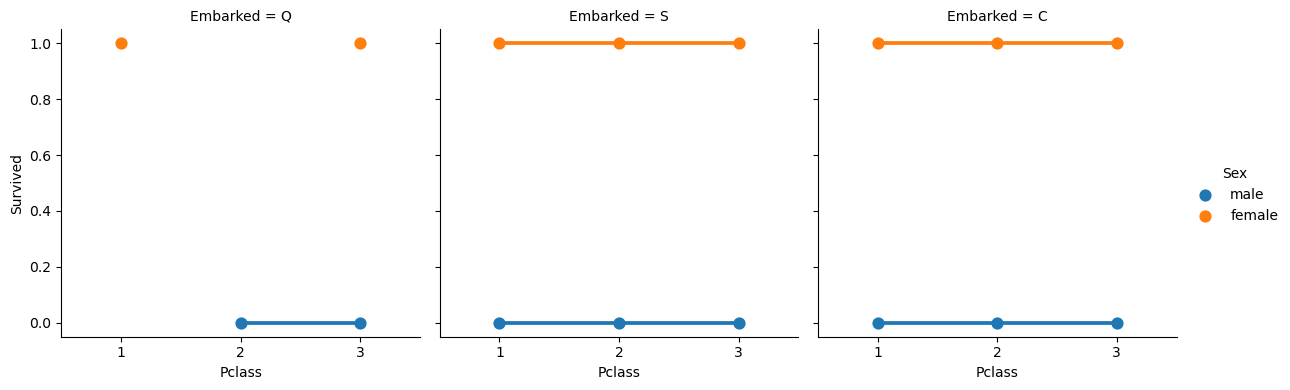

In [15]:
# Q = Queenstown, S = Southampton, C = Cherbourg

sns.catplot(data=data, x="Pclass", y="Survived", col="Embarked", hue="Sex", kind="point", height=4)

### Observation:
* Female passengers had better survival rate when compared to Male.
* Female passengers in Embarked = S and C had Higher survival rate.
* Exception in Embarked = Q where Female had low survival rate.
* Male survival rate is very low in all Embarks.
___

* Embark Survival rate by Fare and Sex

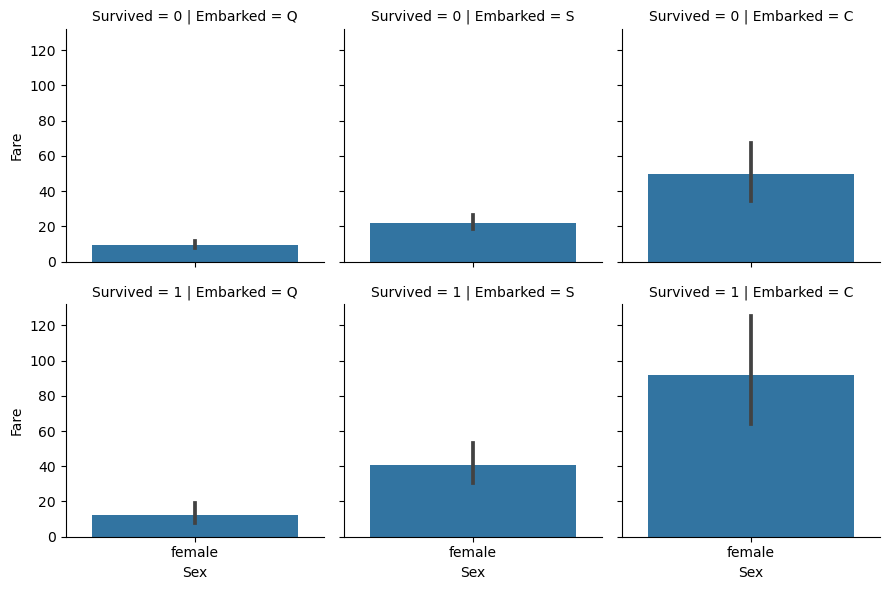

In [16]:
R = sns.FacetGrid(data=data, row="Survived", col="Embarked")
R.map(sns.barplot,"Sex", "Fare")

### Observation:
* Unfortunately no male passengers survived and Only Female passengers survived.
* Female passengers from Embarked = C paid high and got survived.
* Those who paid high (got a safety jacket) who Survived.
___

## Data Cleaning
* let's remove unuseful columns in this dataset.

In [123]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* Let's Remove these unuseful columns PassengerId, Name, Ticket, and Cabin.

In [124]:
data.drop('Name', axis=1, inplace=True)
data.drop('Ticket', axis=1, inplace=True)
data.drop('Cabin', axis=1, inplace=True)
data.drop('PassengerId', axis=1, inplace=True)

In [125]:
data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  34.5      0      0   7.8292        Q
1         1       3  female  47.0      1      0   7.0000        S
2         0       2    male  62.0      0      0   9.6875        Q
3         0       3    male  27.0      0      0   8.6625        S
4         1       3  female  22.0      1      1  12.2875        S

### Remove Null Values

In [126]:
data.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [127]:
data.dropna(subset=['Age'], inplace=True)
data.dropna(subset=['Fare'], inplace=True)

In [128]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Data Modeling

* Create a ageband and determine the correlation between Age and Survived.

In [129]:
data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  34.5      0      0   7.8292        Q
1         1       3  female  47.0      1      0   7.0000        S
2         0       2    male  62.0      0      0   9.6875        Q
3         0       3    male  27.0      0      0   8.6625        S
4         1       3  female  22.0      1      1  12.2875        S

In [130]:
data["AgeBand"] = pd.cut(data["Age"],5)
data[["AgeBand", "Survived"]].groupby("AgeBand", as_index=False).mean().sort_values(by="AgeBand", ascending=True)

AgeBand  Survived
0  (0.0942, 15.336]  0.406250
1  (15.336, 30.502]  0.380952
2  (30.502, 45.668]  0.350000
3  (45.668, 60.834]  0.439024
4    (60.834, 76.0]  0.400000

* Remove the Age column values based on the correlation of AgeBand.

In [131]:
data.loc[data["Age"]<=15, 'Age'] = 0
data.loc[(data["Age"]>15) & (data["Age"]<=30), 'Age'] = 1
data.loc[(data["Age"]>30) & (data["Age"]<=45), 'Age'] = 2
data.loc[(data["Age"]>45) & (data["Age"]<=60), 'Age'] = 3
data.loc[(data["Age"]>60) & (data["Age"]<=76), 'Age'] = 4


In [188]:
data["Age"]=data["Age"].astype(int)

In [189]:
data.head(10)

Survived  Pclass  Sex  Age  Fare  Embarked  IsAlone
0         0       3    0    2     0         1        1
1         1       3    1    3     0         2        0
2         0       2    0    4     1         1        1
3         0       3    0    1     1         2        1
4         1       3    1    1     1         2        0
5         0       3    0    0     1         2        1
6         1       3    1    1     0         1        1
7         0       2    0    1     2         2        0
8         1       3    1    1     0         0        1
9         0       3    0    1     2         2        0

* We don't need the AgeBand Column, so remove.

In [133]:
data.drop('AgeBand', axis=1, inplace=True)
data.head()

Survived  Pclass     Sex  Age  SibSp  Parch     Fare Embarked
0         0       3    male  2.0      0      0   7.8292        Q
1         1       3  female  3.0      1      0   7.0000        S
2         0       2    male  4.0      0      0   9.6875        Q
3         0       3    male  1.0      0      0   8.6625        S
4         1       3  female  1.0      1      1  12.2875        S

___
* Create a Fareband and determine the correlation between Fare and Survived.

In [134]:
data["FareBand"]=pd.qcut(data["Fare"],4)
data[["FareBand", "Survived"]].groupby("FareBand", as_index=False).mean().sort_values(by="FareBand", ascending=True)

FareBand  Survived
0     (-0.001, 8.05]  0.294118
1       (8.05, 16.0]  0.283951
2     (16.0, 40.633]  0.439024
3  (40.633, 512.329]  0.518072

* Change the Fare Column values according the correlation of FareBand.

In [135]:
data.loc[data["Fare"]<=8.05, "Fare"] = 0
data.loc[(data["Fare"]>8.05) & (data["Fare"]<=16.0), "Fare"] = 1
data.loc[(data["Fare"]>16.0) & (data["Fare"]<=40.633), "Fare"] = 2
data.loc[(data["Fare"]>40.633) & (data["Fare"]<=512.329), "Fare"] = 3

data["Fare"]=data["Fare"].astype(int)

* Now remove the FarBand Column.

In [136]:
data.drop("FareBand", axis=1, inplace=True)
data.head()

Survived  Pclass     Sex  Age  SibSp  Parch  Fare Embarked
0         0       3    male  2.0      0      0     0        Q
1         1       3  female  3.0      1      0     0        S
2         0       2    male  4.0      0      0     1        Q
3         0       3    male  1.0      0      0     1        S
4         1       3  female  1.0      1      1     1        S

___
* Let's Add up SibSp and Parch columns into Family Members.

In [137]:
data["Family Members"] = data["SibSp"]+data["Parch"]+1

In [138]:
data[["Family Members","Survived"]].groupby("Family Members", as_index=False).mean().sort_values(by='Survived', ascending=False)

Family Members  Survived
3               4  0.750000
5               6  0.666667
2               3  0.549020
1               2  0.507463
7               8  0.500000
0               1  0.275676
6               7  0.250000
4               5  0.166667
8              11  0.000000

### Observation:
* There is no near correlation.
___

* Now make this Family Members column to IsAlone it will be easy and understand to create model and to predict.

In [139]:
data["IsAlone"]=0
data.loc[data["Family Members"]==1, "IsAlone"] = 1

In [140]:
data.head()

Survived  Pclass     Sex  Age  SibSp  Parch  Fare Embarked  Family Members  \
0         0       3    male  2.0      0      0     0        Q               1   
1         1       3  female  3.0      1      0     0        S               2   
2         0       2    male  4.0      0      0     1        Q               1   
3         0       3    male  1.0      0      0     1        S               1   
4         1       3  female  1.0      1      1     1        S               3   

   IsAlone  
0        1  
1        0  
2        1  
3        1  
4        0

* Now Remove SibSp, Parch, Family Members columns.

In [141]:
data.drop('SibSp', axis=1, inplace=True)
data.drop('Parch', axis=1, inplace=True)
data.drop('Family Members', axis=1, inplace=True)

In [142]:
data.head()

Survived  Pclass     Sex  Age  Fare Embarked  IsAlone
0         0       3    male  2.0     0        Q        1
1         1       3  female  3.0     0        S        0
2         0       2    male  4.0     1        Q        1
3         0       3    male  1.0     1        S        1
4         1       3  female  1.0     1        S        0

___
* Change the Gender values to Male = 0 and Female = 1
* Change the Embarked values to C = 0, Q = 1, S = 2

In [143]:
data["Sex"] = data["Sex"].map({'male':0, 'female':1}).astype(int)
data["Embarked"] = data["Embarked"].map({'C':0, 'Q':1, 'S':2}).astype(int)

In [205]:
data.head()

Survived  Pclass  Sex  Age  Fare  Embarked  IsAlone
0         0       3    0    2     0         1        1
1         1       3    1    3     0         2        0
2         0       2    0    4     1         1        1
3         0       3    0    1     1         2        1
4         1       3    1    1     1         2        0

* The data is ready for model development.
___

## Training the Model

* Build the model with X_train and Y_train.

In [190]:
X = data.drop('Survived', axis=1)
X

Pclass  Sex  Age  Fare  Embarked  IsAlone
0         3    0    2     0         1        1
1         3    1    3     0         2        0
2         2    0    4     1         1        1
3         3    0    1     1         2        1
4         3    1    1     1         2        0
..      ...  ...  ...   ...       ...      ...
409       3    1    0     1         2        0
411       1    1    2     3         1        0
412       3    1    1     0         2        1
414       1    1    2     3         0        1
415       3    0    2     0         2        1

[331 rows x 6 columns]

In [191]:
Y = data['Survived']
Y

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 331, dtype: int64

* The data will be split into 80% as X_train and 20% as Y_train.
___

In [266]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [267]:
X_train

Pclass  Sex  Age  Fare  Embarked  IsAlone
281       3    0    0     1         2        0
96        1    1    4     3         2        0
341       3    0    2     0         2        1
18        3    1    1     0         2        0
26        1    1    1     3         0        0
..      ...  ...  ...   ...       ...      ...
237       3    0    1     0         0        1
86        3    1    1     0         1        1
134       3    0    2     0         2        1
345       3    1    1     0         2        1
128       2    0    2     1         2        1

[264 rows x 6 columns]

In [268]:
X_test

Pclass  Sex  Age  Fare  Embarked  IsAlone
27        3    0    1     0         0        1
389       3    0    0     2         2        0
89        2    0    0     2         2        0
280       3    1    1     1         2        1
68        1    0    2     2         0        1
..      ...  ...  ...   ...       ...      ...
397       1    1    3     3         0        0
3         3    0    1     1         2        1
95        3    0    1     0         2        1
308       1    0    3     3         2        0
71        3    0    1     0         2        1

[67 rows x 6 columns]

___
## Model Development

In [280]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,Y_train)


RandomForestClassifier(random_state=42)

In [281]:
y_pred = rf.predict(X_test)
print("Confidence Score:",round(rf.score(X_train,Y_train)*100,2))

Confidence Score: 100.0


In [290]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [291]:
print(classification_report(Y_test, y_pred))
print("Classification Report:")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Classification Report:


In [289]:
print("Confusion Matrix:")
confusion_matrix(Y_test,y_pred)

Confusion Matrix:


array([[45,  0],
       [ 0, 22]], dtype=int64)

___
## Saving the Model

In [255]:
import pickle

In [256]:
with open('titaninc_model', 'wb') as f:
    pickle.dump(rf,f)

In [258]:
with open('titanic_model', 'rb') as f:
    model = pickle.load(f)

___
## Prediction

In [293]:
prediction = model.predict([[3,0,2,0,1,1]])

if pred==0:
    print('Did not Survive!')
else:
    print('Survive!')

Did not Survive!


## Thank You!